# Analyse des Facteurs d'Émissions Routières (HBEFA v4.1)

## Introduction
Ce Notebook explore les facteurs d’émissions routières (CO, HC, NOx, particules) pour différentes catégories de véhicules et types de circulation en France (urbain, rural, mixte). Les données proviennent de la base HBEFA v4.1 et couvrent la période de 2020 à 2030. 


- Problématique
- Présenter les jeux de données
- Conclusion

### Objectifs :
- <span style="color:green;">Explorer les tendances des émissions en fonction de la catégorie des véhicules, de leur carburant et type de circulation.</span>
- <span style="color:green;">Identifier les catégories les plus émettrices de polluants.</span>
- <span style="color:green;">Visualiser l’évolution des émissions dans le temps.</span>
- <span style="color:red;">Fournir des insights pour réduire les émissions dans le secteur des transports</span>.

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations générales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Chargement et Inspection des Données
Nous commençons par charger les données depuis un fichier CSV. Ensuite, nous inspectons la structure pour comprendre les colonnes disponibles.

In [2]:
# Chargement des données
data = pd.read_csv("etude-facteurs-d'emissions-des-differents-modes-de-transport-routier.csv") 

In [3]:
# Aperçu des données
data.head()

,Année,Véhicule,Carburant,Roulage,CO (g/km),HC (g/km),NOx (g/km),Particules (g/km)
0,2020,2RM,essence,France,2.696,0.429,0.111,0.030
1,2020,2RM,essence,Rural,3.438,0.400,0.123,0.029
2,2020,2RM,essence,Urbain,1.572,0.458,0.090,0.031
3,2021,2RM,essence,France,2.418,0.395,0.098,0.031
4,2021,2RM,essence,Rural,3.080,0.371,0.109,0.030


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Année              264 non-null    int64  
 1   Véhicule           264 non-null    object 
 2   Carburant          264 non-null    object 
 3   Roulage            264 non-null    object 
 4   CO (g/km)          264 non-null    float64
 5   HC (g/km)          264 non-null    float64
 6   NOx (g/km)         264 non-null    float64
 7   Particules (g/km)  264 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 16.6+ KB


In [6]:
# Vérifions les colonnes
data.columns

Index(['Année', 'Véhicule', 'Carburant', 'Roulage', 'CO (g/km)', 'HC (g/km)',
       'NOx (g/km)', 'Particules (g/km)'],
      dtype='object')

Ce jeu de données est issu de la base de données européenne HBEFA v4.1 (Handbook of emissions factors for Road Transport) qui fournit des facteurs d’émissions, c’est-à-dire des émissions de polluants en g/km pour toutes les catégories de véhicules routiers (voiture particulière, véhicule utilitaire léger, véhicule lourd et deux-roues motorisé), chacune étant divisée en plusieurs sous-catégories, pour une grande variété de situations de trafic (type de voirie, vitesse limite et niveau de saturation du trafic associé). Les données extraites sont des facteurs d’émissions agrégés de CO, HC, NOx et particules par catégorie de véhicules (voiture, véhicule utilitaire léger, poids lourd, autocar, bus et deux roues motorisées), par carburant (essence, gazole et GNV uniquement pour les bus), pour des conditions de circulation moyennes (urbain, rural et mixte France) et pour chaque année allant de 2020 à 2030.

Les données semblent bien organisées, sans valeurs manquantes et sans valeurs aberrantes évidentes à première vue.
En revanche, seule les véhicules routiers sont présents dans ce jeu de données. Certaines typologies de véhicules sont absentes : Train, Avion, Bateau, Trotinnette electrique et Vélo notamment. De plus, Si nous voulons évaluer le bilan carbonne des véhicules il faudra trouver un moyen de convertir chaque émission en équivalent CO2 (métrique utilisée pour définir le bilan carbonne d'une activité humaine). 

## Analyse Exploratoire des Données
Dans cette section nous allons explorer les données avec des statistiques descriptives et des visualisations pour mieux comprendre les tendances des émissions.

In [7]:
# Résumé des Statistiques 
data.describe().round(4)

,Année,CO (g/km),HC (g/km),NOx (g/km),Particules (g/km)
count,264.0000,264.0000,264.0000,264.0000,264.0000
mean,2025.0000,0.8814,0.1117,0.9393,0.0170
std,3.1683,0.6569,0.1020,1.0092,0.0154
min,2020.0000,0.1400,0.0170,0.0250,0.0010
25%,2022.0000,0.3070,0.0310,0.2160,0.0020
50%,2025.0000,0.7045,0.0720,0.5715,0.0145
75%,2028.0000,1.2860,0.1912,1.2562,0.0290
max,2030.0000,3.4380,0.4580,5.2550,0.0740


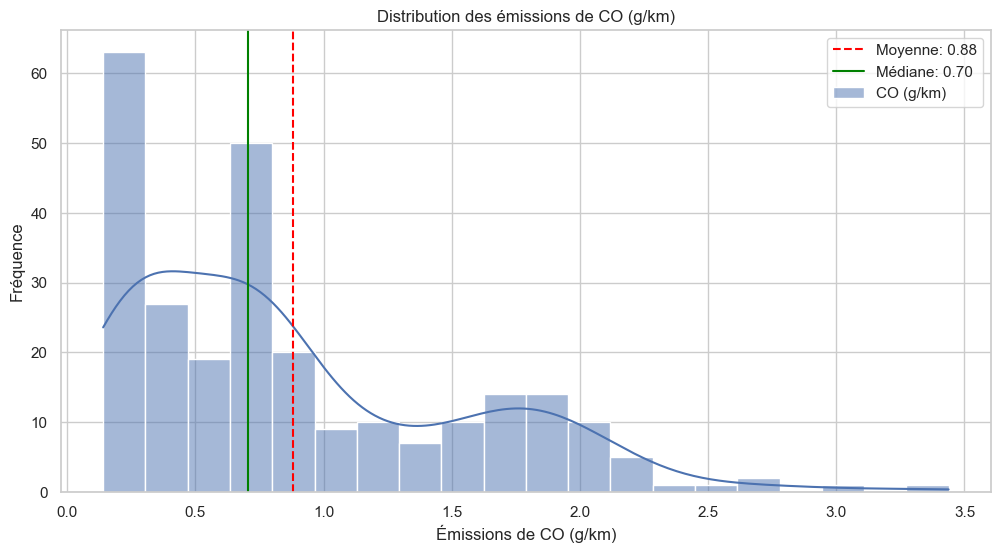

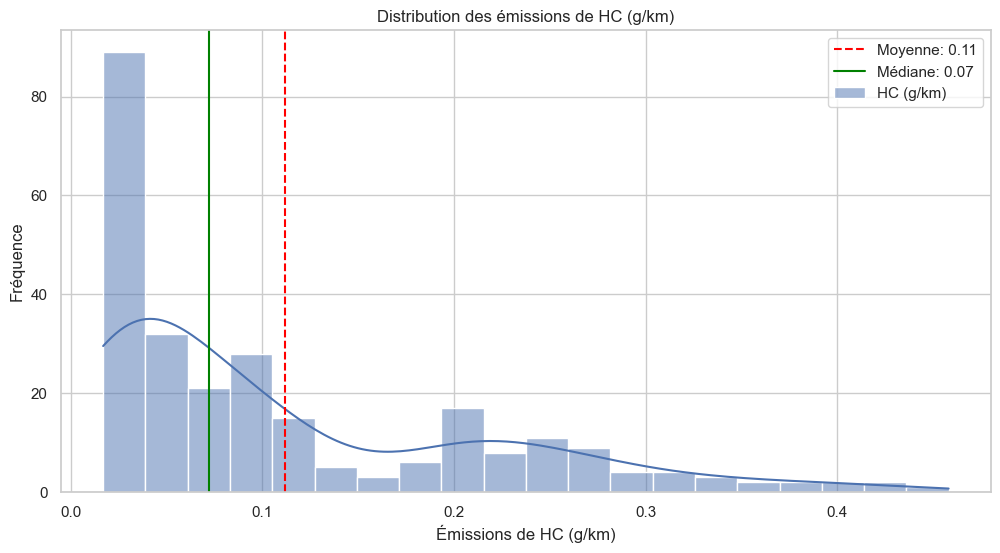

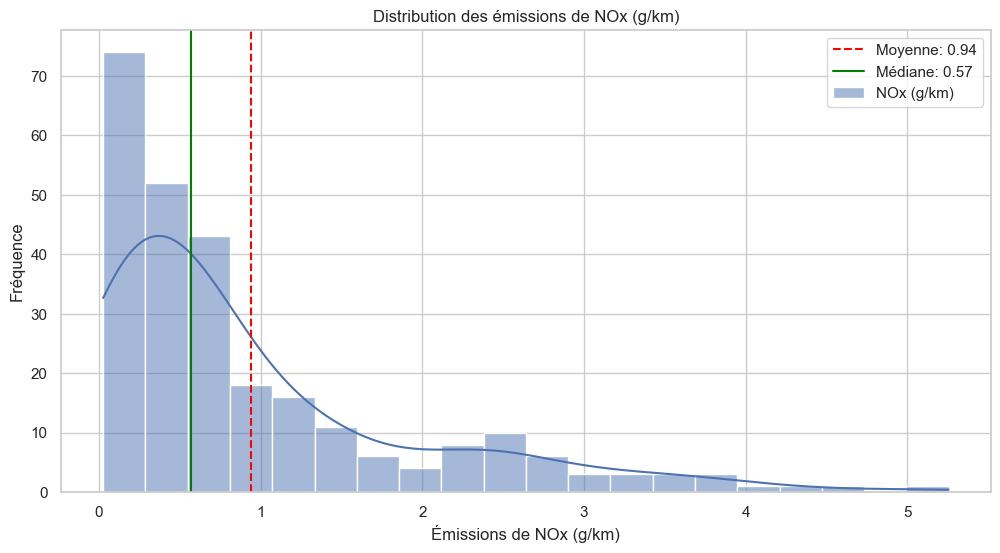

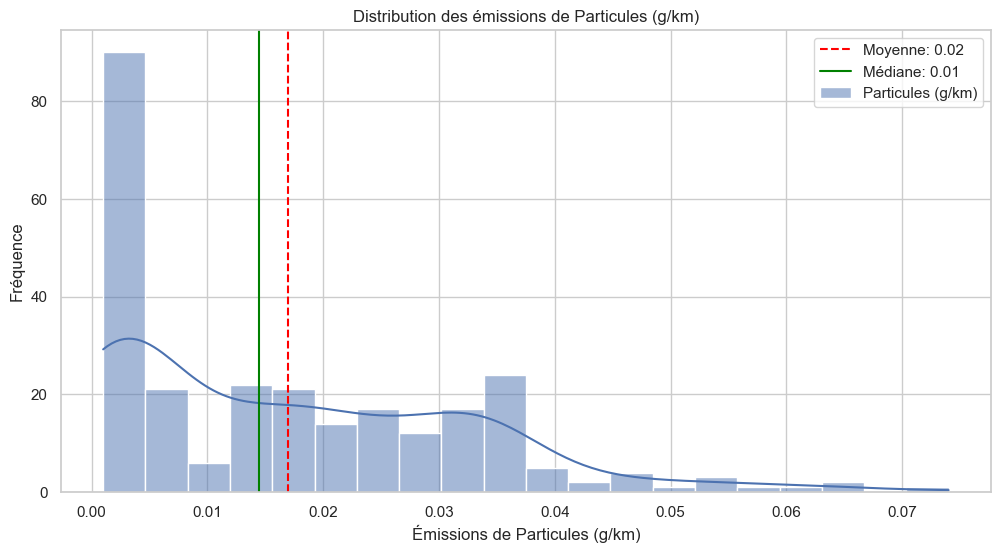

In [13]:
# Histogramme mettant en avant la distribution des émissions pour chaque polluant
polluants = ['CO (g/km)', 'HC (g/km)', 'NOx (g/km)', 'Particules (g/km)']

for polluant in polluants:
    sns.histplot(data[polluant], kde=True, bins=20, label=polluant)

    # Calcul des statistiques
    mean_value = np.mean(data[polluant])  # Moyenne
    median_value = np.median(data[polluant])  # Médiane
    
    # Ajout des lignes verticales pour la moyenne et la médiane
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Moyenne: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', label=f'Médiane: {median_value:.2f}')
    
    plt.title(f'Distribution des émissions de {polluant}')
    plt.xlabel(f'Émissions de {polluant}')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

En faisant varier le nombre de bins, on s'aperçoit qu'on peut obtenir des courbes de densité différentes.

En observant ces graphiques, il pourrait être tentant d’éliminer les valeurs qui apparaissent comme des valeurs aberrantes (outliers). 
Or, en l'absence de données détaillées sur la typologie des véhicules utilisés par les automobilistes français, notamment les véhicules anciens ou spécifiques non pris en compte dans les données actuelles (2020-2030), il nous paraît important de conserver les valeurs extrêmes présentes dans les données d’émissions agrégées. Ces valeurs peuvent refléter des situations réelles, bien que potentiellement rares (ou pas), et représenter des sources significatives de pollution (ou pas). 

Par conséquent, sans informations complémentaires sur la part de marché des différents types de véhicules, il est plus responsable de garder ces valeurs pour fournir une analyse la plus honnête possible aujourd'hui et probablement plus pertinente dans un second temps une fois que nous aurons approfondie notre travail. 

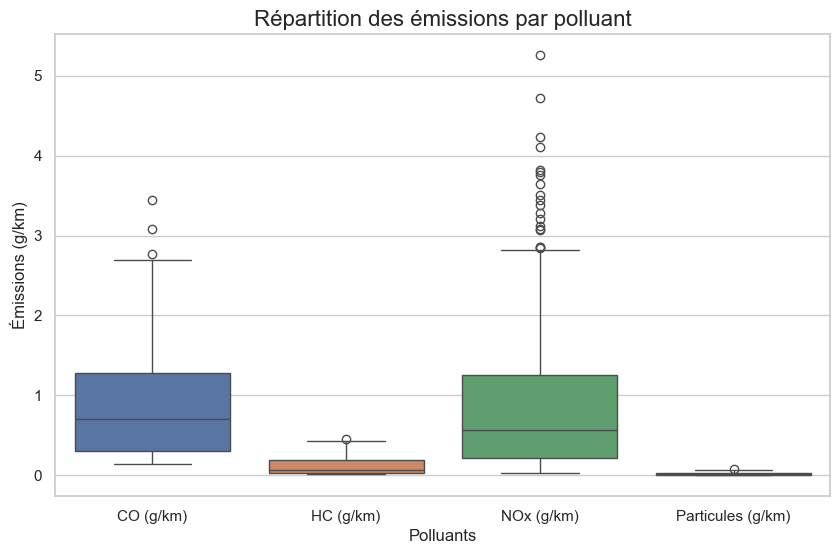

In [14]:
# Création d'un boxplot pour chaque polluant
plt.figure(figsize=(10, 6))  # Taille du graphique

# Boxplot
sns.boxplot(data=data[polluants])

# Titre et labels
plt.title('Répartition des émissions par polluant', fontsize=16)
plt.xlabel('Polluants', fontsize=12)
plt.ylabel('Émissions (g/km)', fontsize=12)

# Affichage du graphique
plt.show()

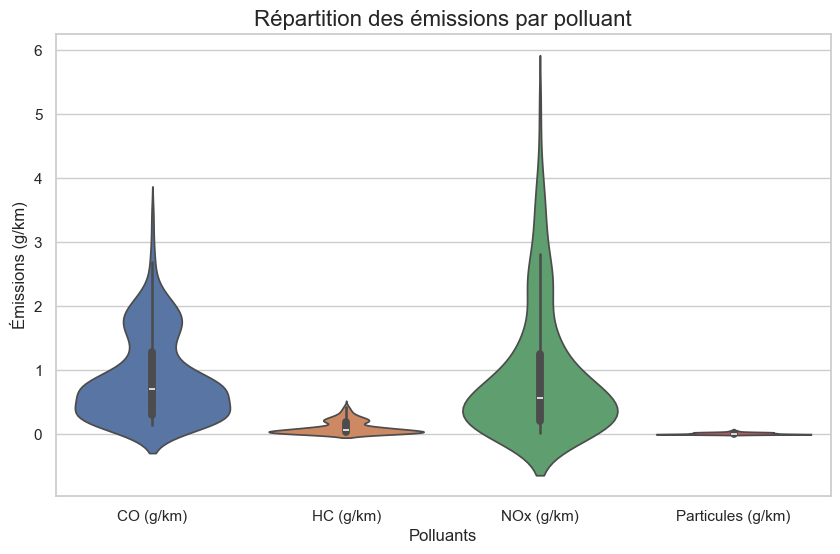

In [18]:
# Création d'un violin plot pour chaque polluant afin de représenter la densité des points.
plt.figure(figsize=(10, 6))  # Taille du graphique

# violinplot
sns.violinplot(data=data[polluants])

# Titre et labels
plt.title('Répartition des émissions par polluant', fontsize=16)
plt.xlabel('Polluants', fontsize=12)
plt.ylabel('Émissions (g/km)', fontsize=12)

# Affichage du graphique
plt.show()

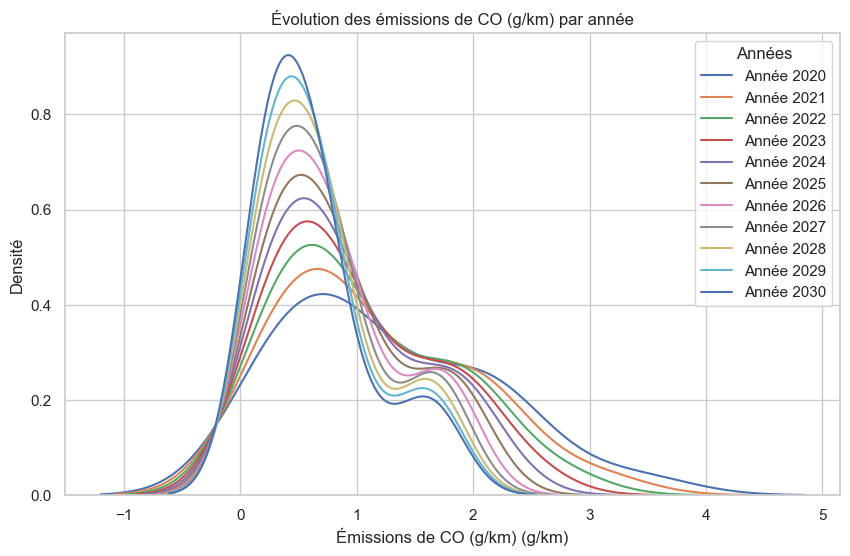

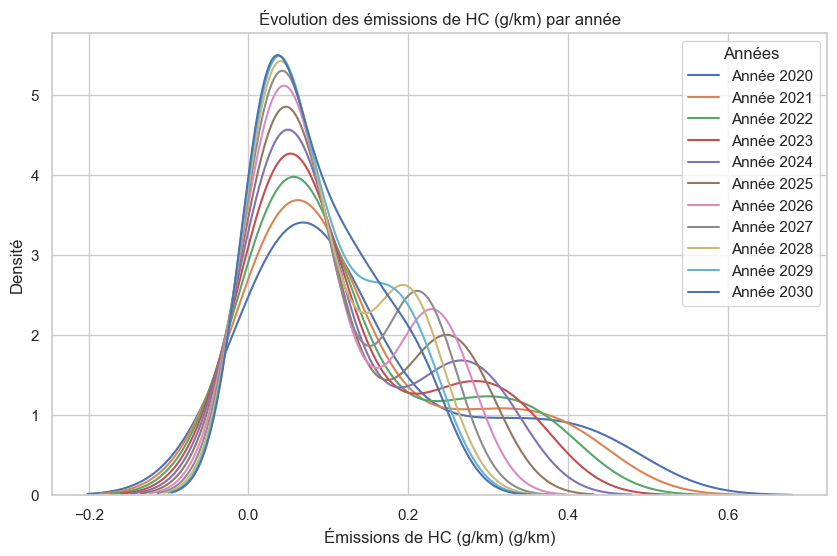

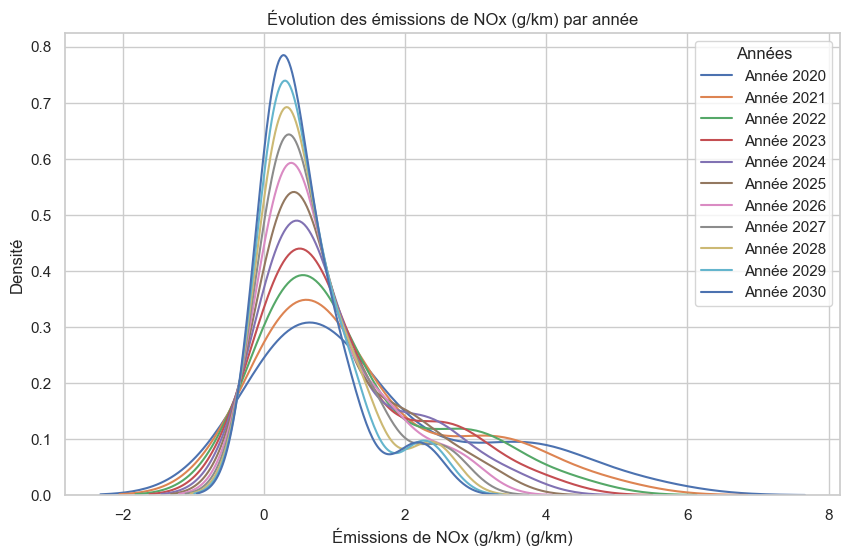

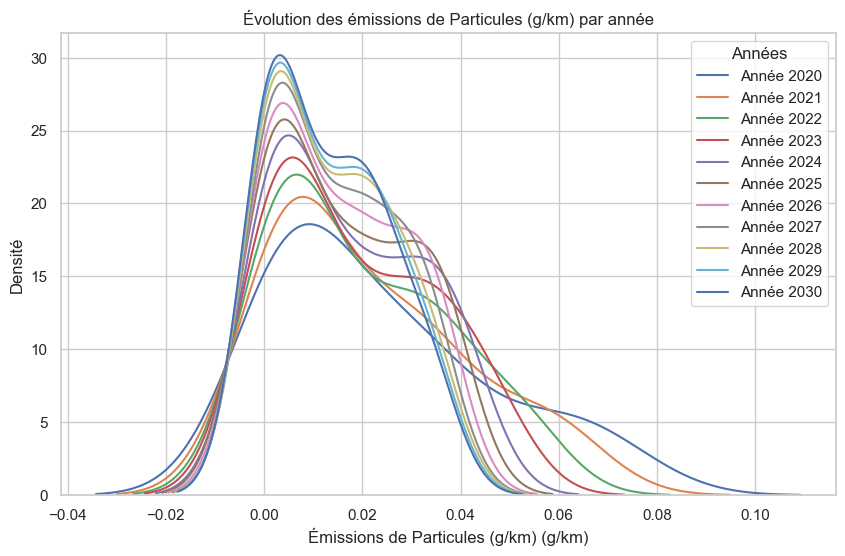

In [17]:
# Boucle pour chaque polluant
for polluant in polluants:
    plt.figure(figsize=(10, 6))  # Taille de la figure
    # Parcourir chaque année unique
    for annee in data['Année'].unique():
        data_annee = data[data['Année'] == annee]  # Filtrer les données par année
        # Tracer une courbe de densité pour chaque année
        sns.kdeplot(data_annee[polluant], label=f"Année {annee}", fill=False)
    
    # Ajouter des détails au graphique
    plt.title(f"Évolution des émissions de {polluant} par année")
    plt.xlabel(f"Émissions de {polluant} (g/km)")
    plt.ylabel("Densité")
    plt.legend(title="Années")
    plt.grid(True)
    plt.show()

          CO (g/km)  HC (g/km)  NOx (g/km)  Particules (g/km)
Véhicule                                                     
2RM        1.594333   0.276273    0.063727           0.033212
Autocar    0.803152   0.049667    2.293879           0.031303
Bus        1.063000   0.104273    1.728303           0.029182
PL         0.523545   0.063455    1.742667           0.020788
VUL        0.252545   0.020727    0.597697           0.014303
Voiture    0.938192   0.126323    0.362778           0.002313


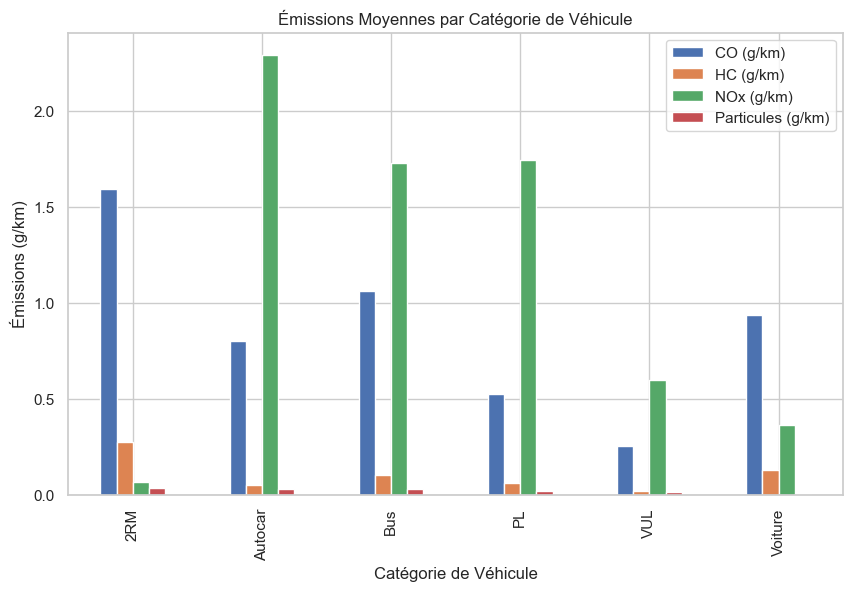

In [10]:
# Émissions moyennes par type de véhicule
emissions_par_vehicule = data.groupby('Véhicule')[polluants].mean()
print(emissions_par_vehicule)

# Visualisation
emissions_par_vehicule.plot(kind='bar', figsize=(10, 6))
plt.title('Émissions Moyennes par Catégorie de Véhicule')
plt.ylabel('Émissions (g/km)')
plt.xlabel('Catégorie de Véhicule')
plt.show()

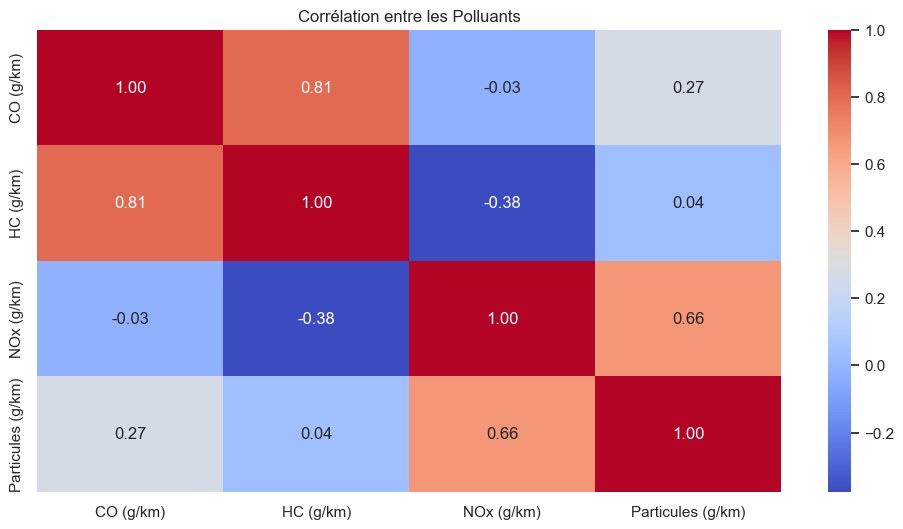

In [20]:
# Matrice de corrélation
corr = data[polluants].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les Polluants")
plt.show()

## Préparation des Données
Avant d’effectuer des analyses avancées, nous nettoyons les données : gestion des valeurs manquantes, filtrage des colonnes inutiles et vérification des doublons.

In [21]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

Année                0
Véhicule             0
Carburant            0
Roulage              0
CO (g/km)            0
HC (g/km)            0
NOx (g/km)           0
Particules (g/km)    0
dtype: int64


In [22]:
# Suppression des lignes contenant des valeurs manquantes
data_cleaned = data.dropna()
# Vérification des doublons
print(data_cleaned.duplicated().sum())

0


## Analyse Approfondie : Évolution des Émissions dans le Temps
Nous analysons comment les émissions évoluent dans le temps pour différentes catégories de véhicules et types de circulation.

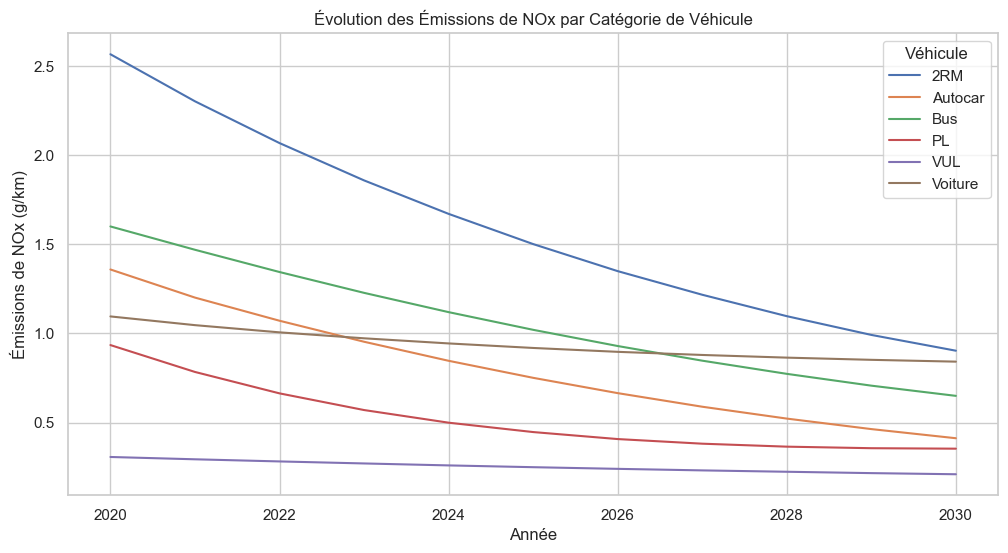

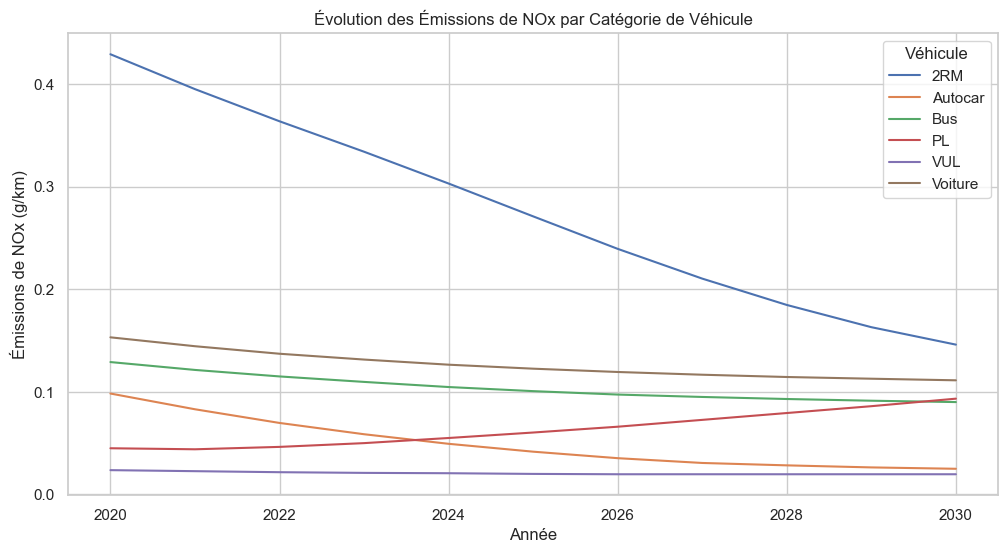

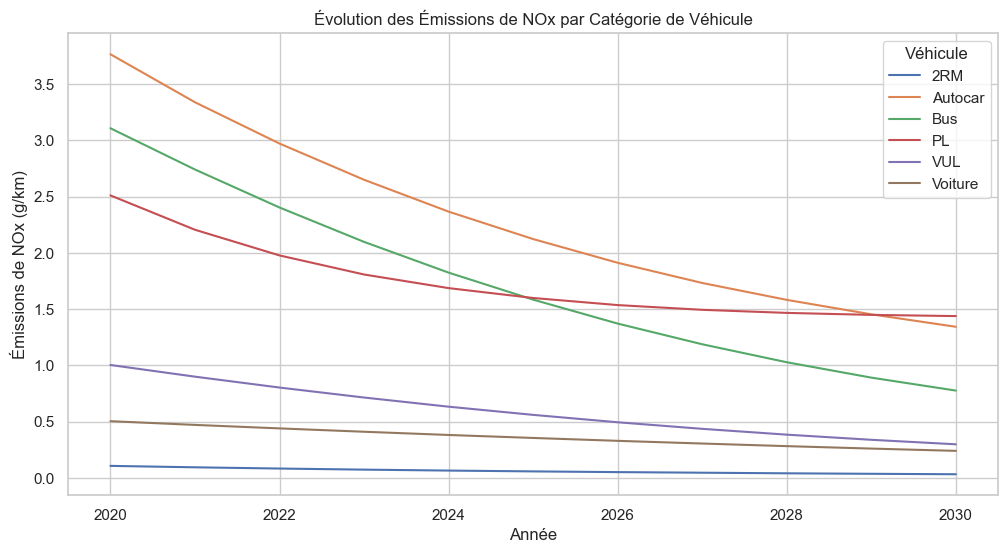

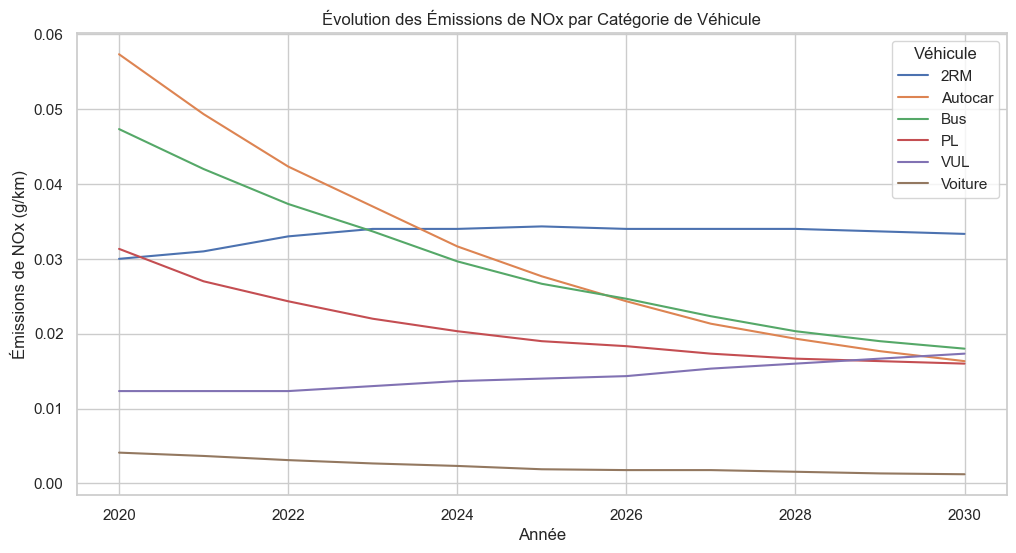

In [26]:
# Agrégation des données
emissions_temps = data_cleaned.groupby(['Année', 'Véhicule'])[polluants].mean().reset_index()

for polluant in polluants:
    # Visualisation pour NOx (exemple)
    sns.lineplot(data=emissions_temps, x='Année', y=polluant, hue='Véhicule')
    plt.title('Évolution des Émissions de NOx par Catégorie de Véhicule')
    plt.ylabel('Émissions de NOx (g/km)')
    plt.xlabel('Année')
    plt.show()

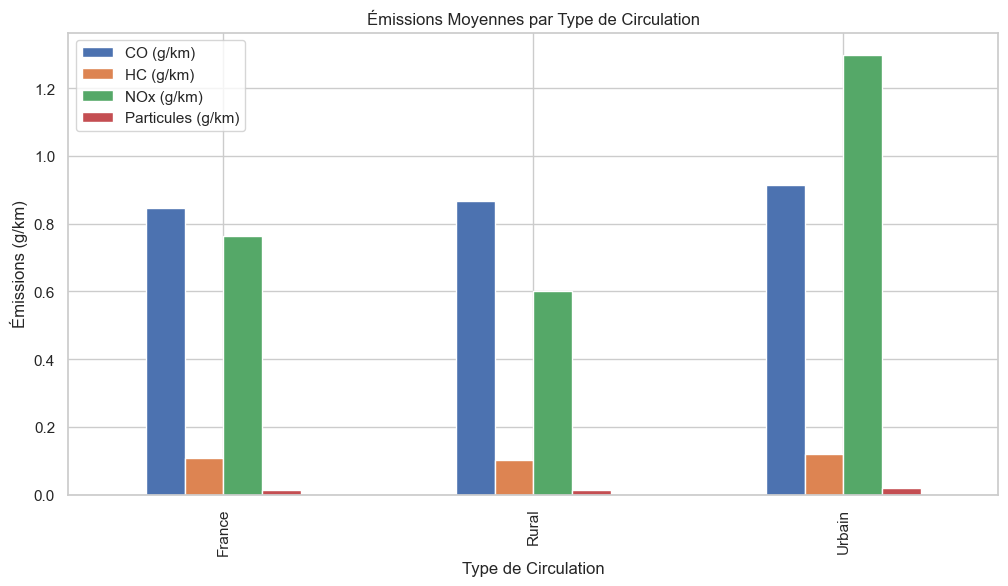

In [24]:
# Moyennes par type de circulation
emissions_circulation = data_cleaned.groupby('Roulage')[polluants].mean()

# Visualisation
emissions_circulation.plot(kind='bar')
plt.title('Émissions Moyennes par Type de Circulation')
plt.ylabel('Émissions (g/km)')
plt.xlabel('Type de Circulation')
plt.show()

# Résultats et Interprétations 

# Conclusion